**Project 1: Air Quality Analysis**  
- **Dataset**: "Air Quality" (available on Kaggle)  
- **Description**: Analyzing air quality parameters to predict pollution levels.  
- **Objectives**:  
  - Explore pollution data (PM2.5, temperature, humidity).  
  - Identify relationships between different environmental factors.  
  - Visualize pollution trends over time and across different regions.

Importation of Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [17]:
df = pd.read_csv('global air pollution dataset.csv')  # Load the dataframe

Exporation of data

In [18]:
print(df.head()) #First 5 rows of dataframe

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

In [19]:
print(df.info()) #General info of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


In [21]:
print(df.describe()) #Statistic Resume

          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


Cleaning of dataset

In [45]:
#Printing missing values
print(df.isnull().sum())

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


In [38]:
# Deleting missing rows
df.dropna(inplace=True)


In [46]:
#Type of rows
print(df.dtypes)

Country                 object
City                    object
AQI Value                int64
AQI Category          category
CO AQI Value             int64
CO AQI Category       category
Ozone AQI Value          int64
Ozone AQI Category    category
NO2 AQI Value            int64
NO2 AQI Category      category
PM2.5 AQI Value          int64
PM2.5 AQI Category    category
dtype: object


In [47]:
#Converting text in category
cols = ["AQI Category", "CO AQI Category", "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]
for col in cols:
    df[col] = df[col].astype("category")


In [49]:
#Display all possible values in a column:
print(df["AQI Category"].unique())

['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
Categories (6, object): ['Good', 'Hazardous', 'Moderate', 'Unhealthy',
                         'Unhealthy for Sensitive Groups', 'Very Unhealthy']


In [51]:
#Fix errors if detected:
df["AQI Category"] = df["AQI Category"].replace({"moderat": "Moderate"})

In [53]:
#Check for very large or negative values
print(df.describe())


          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23035.000000  23035.000000     23035.000000   23035.000000   
mean      72.344693      1.376254        35.233905       3.084741   
std       56.360992      1.844926        28.236613       5.281708   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       80.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23035.000000  
mean         68.883482  
std          55.057396  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [54]:
#Remove negative values
df = df[df["AQI Value"] >= 0]


In [55]:
#Check if duplicates
print(df.duplicated().sum())


0


Visualization of Data

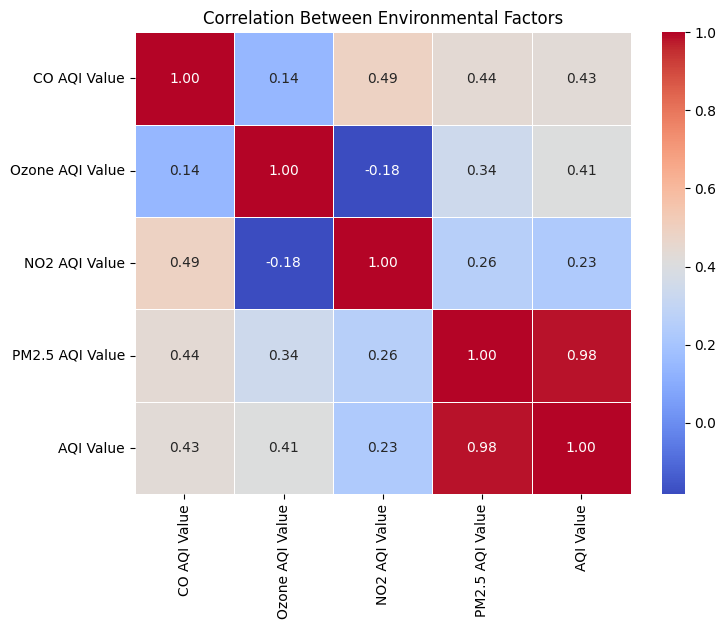

In [72]:
# Finding Relationships Between Environmental Factors

# Calculate the correlation matrix for relevant columns
correlation_matrix = df[["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value", "AQI Value"]].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Environmental Factors")
plt.show()


<ipython-input-73-01bf3b468aac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_by_country.index, y=avg_aqi_by_country.values, palette="Reds_r")


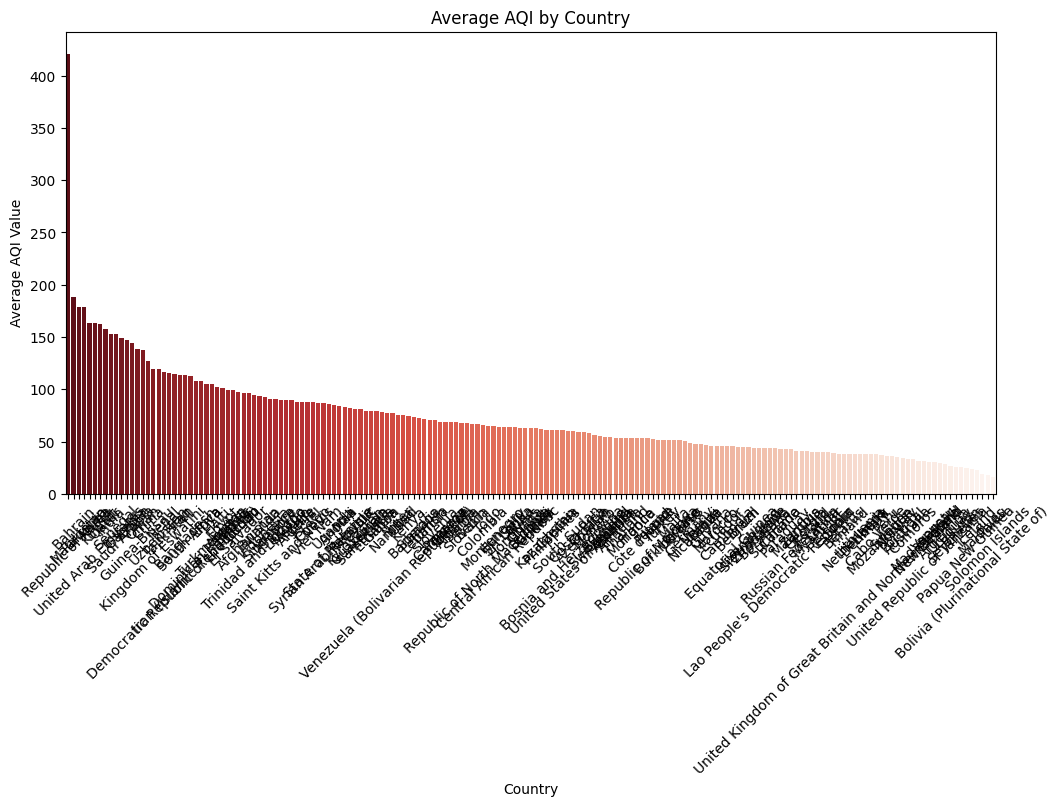

In [73]:
# Visualizing Pollution Trends by Region

# Calculate the average AQI by country or by city (if country is not available)
if 'Country' in df.columns:
    avg_aqi_by_country = df.groupby("Country")["AQI Value"].mean().sort_values(ascending=False)

    # Visualize the average AQI by country
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_aqi_by_country.index, y=avg_aqi_by_country.values, palette="Reds_r")
    plt.title("Average AQI by Country")
    plt.xticks(rotation=45)
    plt.ylabel("Average AQI Value")
    plt.show()

else:
    # If 'Country' is missing, use 'City'
    avg_aqi_by_city = df.groupby("City")["AQI Value"].mean().sort_values(ascending=False)

    # Visualize the average AQI by city
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_aqi_by_city.index, y=avg_aqi_by_city.values, palette="coolwarm")
    plt.title("Average AQI by City")
    plt.xticks(rotation=90)
    plt.ylabel("Average AQI Value")
    plt.show()


Summary of Actions:
Correlation Analysis: Use a heatmap to visualize how AQI is related to factors like CO, Ozone, NO2, and PM2.5.
Regional AQI Visualization: Use bar plots to visualize AQI by country or city.
Temporal Trends (Optional): If time-related data were available, you could visualize AQI trends over time.